![Advection of a rectangular profile](problem.png)

Advection of a rectangular profile (thin blue curve): Δx=0.2, u=1.

Initial condition: C=10 for -1≤x≤1 & C=0 else.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The initial condition and analytical function is the same as previous practice.

In [2]:
dx = 0.2
dt = 0.1
dt2 = 0.5
u = 1
t_sp = np.arange(0, 16, dt)
t_sp2 = np.arange(0, 16, dt2)
x = np.arange(-20, 20, dx)

C_ITZ_1 = np.zeros((len(x), len(t_sp)))
C_ITZ_2 = np.zeros((len(x), len(t_sp2)))
C_real = np.zeros((len(x), len(t_sp)))

In [3]:
for i in range(len(x)):
    if x[i] <= 1 and x[i] >= -1:
        C_ITZ_1[i, 0] = 10
        C_ITZ_2[i, 0] = 10
    else:
        C_ITZ_1[i, 0] = 0
        C_ITZ_2[i, 0] = 0

In [4]:
A_1 = np.zeros((len(x), len(x)))
B_1 = np.zeros((len(x), len(x)))
A_2 = np.zeros((len(x), len(x)))
B_2 = np.zeros((len(x), len(x)))

for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            A_1[i, j] = -1
            B_1[i, j] = 1
            A_2[i, j] = -1
            B_2[i, j] = 1
        if i == j + 1:
            A_1[i, j] = -u * dt / (4 * dx)
            B_1[i, j] = -u * dt / (4 * dx)
            A_2[i, j] = -u * dt2 / (4 * dx)
            B_2[i, j] = -u * dt2 / (4 * dx)
        if i == j - 1:
            A_1[i, j] = u * dt / (4 * dx)
            B_1[i, j] = u * dt / (4 * dx)
            A_2[i, j] = u * dt2 / (4 * dx)
            B_2[i, j] = u * dt2 / (4 * dx)

In [5]:
matA_1 = np.matrix(A_1)
matA_2 = np.matrix(A_2)
matB_1 = np.matrix(B_1)
B_inv_1 = np.linalg.inv(B_1)
matB_2 = np.matrix(B_2)
B_inv_2 = np.linalg.inv(B_2)

for n in range(0, len(t_sp) - 1):
    C_ITZ_vec = np.matrix(C_ITZ_1[:, n])
    C_ITZ_1[:, n + 1] = (-B_inv_1 * (matA_1 * C_ITZ_vec.T)).T

for n in range(0, len(t_sp2) - 1):
    C_ITZ_vec2 = np.matrix(C_ITZ_2[:, n])
    C_ITZ_2[:, n + 1] = (-B_inv_2 * (matA_2 * C_ITZ_vec2.T)).T

In [6]:
for j in range(len(t_sp)):
    for i in range(len(x)):
        if x[i] >= -1 + u * t_sp[j] and x[i] <= 1 + u * t_sp[j]:
            C_real[i, j] = 10
        else:
            C_real[i, j] = 0

In [7]:
for i in range(len(t_sp)):
    if t_sp[i] == 5:
        t1 = i
    if t_sp[i] == 10:
        t2 = i
    if t_sp[i] == 15:
        t3 = i

for i in range(len(t_sp2)):
    if t_sp2[i] == 5:
        t4 = i
    if t_sp2[i] == 10:
        t5 = i
    if t_sp2[i] == 15:
        t6 = i

tpoint = [t1, t2, t3]
tpoint2 = [t4, t5, t6]

Text(0.5, 0, 'X')

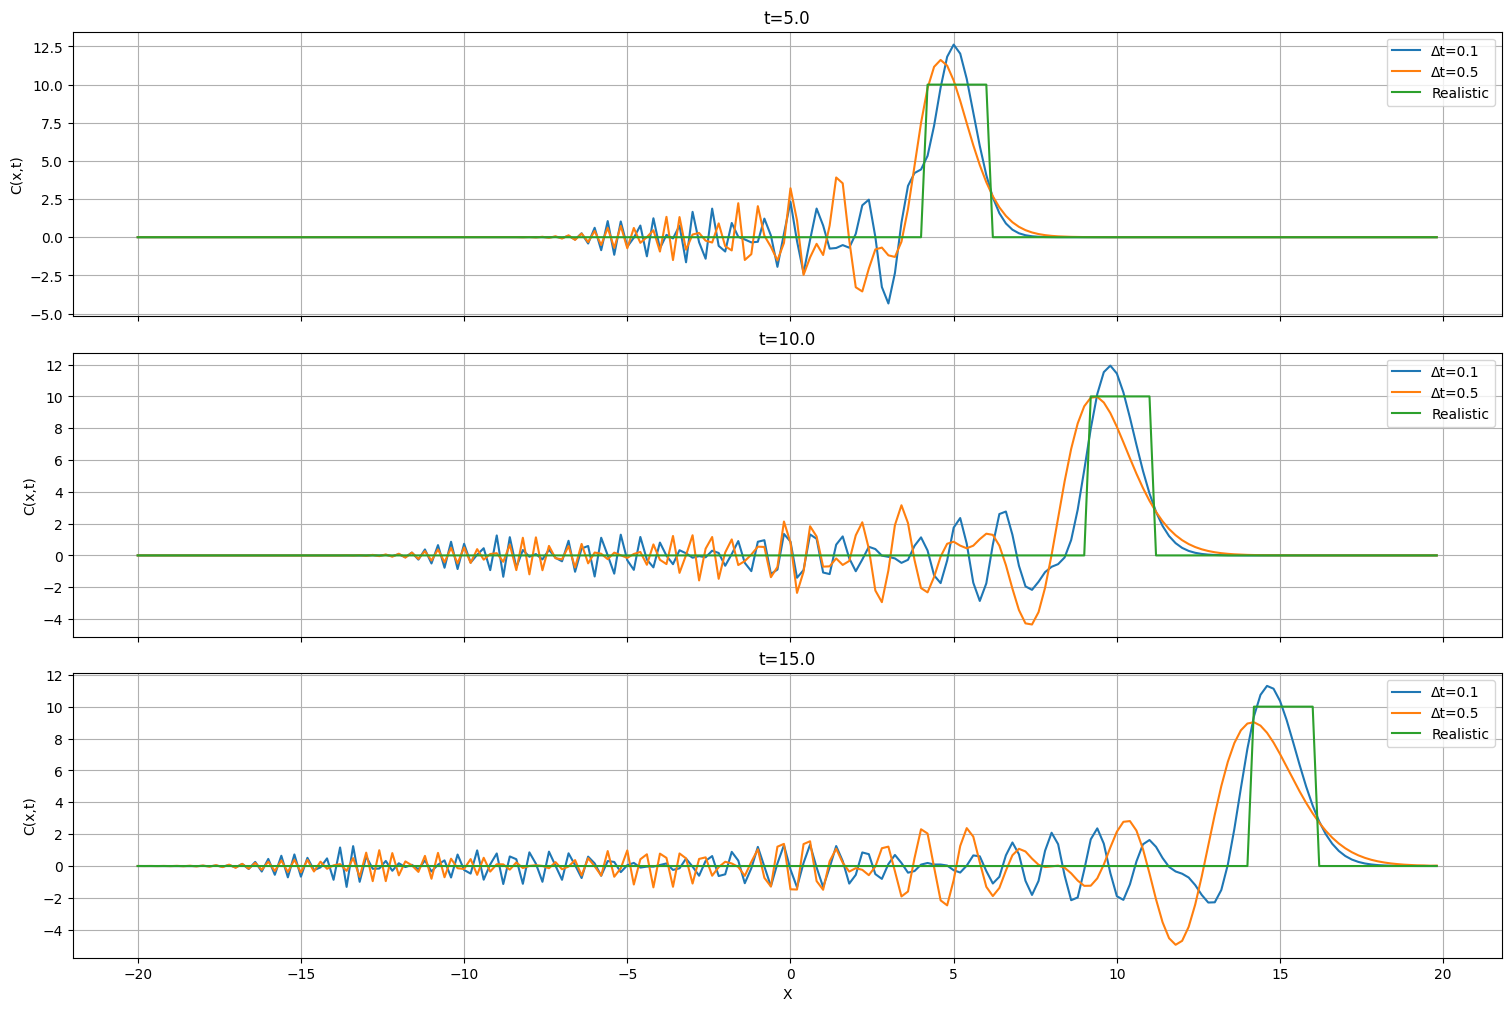

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), constrained_layout=True, sharex=True)

for i in range(0, 3):
    ax[i].set_title(r't=' + str(t_sp[tpoint[i]]))
    ax[i].plot(x, C_ITZ_1[:, tpoint[i]], label='Δt=0.1')
    ax[i].plot(x, C_ITZ_2[:, tpoint2[i]], label='Δt=0.5')
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylabel('C(x,t)')

ax[2].set_xlabel('X')

Both cases of Δt=0.1 and Δt=0.5 can show the moving peak but still have large oscillations. But for all 3 time steps, the peak of Δt=0.1 curve seems to be more stable, the Δt=0.5 curve fluctuate above and under the square wave.

The following code to calculate CTCS, FCTS and FTUS are all from previous practice, I just overlay them.

In [9]:
C_CTCS = np.zeros((len(x), len(t_sp)))
C_FTCS = np.zeros((len(x), len(t_sp)))
C_FTUS = np.zeros((len(x), len(t_sp)))

In [10]:
for i in range(len(x)):
    if x[i] <= 1 and x[i] >= -1:
        C_CTCS[i, 0] = 10
        C_FTCS[i, 0] = 10
        C_FTUS[i, 0] = 10
    else:
        C_CTCS[i, 0] = 0
        C_FTCS[i, 0] = 0
        C_FTUS[i, 0] = 0

In [11]:
# CTCS
for m in range(1, len(x) - 1):
    C_CTCS[m, 1] = C_CTCS[m, 0] - u * dt / (2 * dx) * (C_CTCS[m + 1, 0] - C_CTCS[m - 1, 0])
    
for n in range(1, len(t_sp) - 1):
    for m in range(1, len(x) - 1):
        C_CTCS[m, n + 1] = C_CTCS[m, n - 1] - (u * dt / dx) * (C_CTCS[m + 1, n] - C_CTCS[m - 1, n])

In [12]:
#FTCS 
for n in range(0, len(t_sp) - 1):
    for m in range(1, len(x) - 1):
        C_FTCS[m,n+1]=C_FTCS[m,n]-u*dt/(2*dx)*(C_CTCS[m+1,n]-C_CTCS[m-1,n])

In [13]:
# FTUS
for n in range(0, len(t_sp) - 1):
    for m in range(0, len(x) - 1):
        C_FTUS[m, n + 1] = C_FTUS[m, n] - (u * dt / dx) * (C_FTUS[m, n] - C_FTUS[m - 1, n])

Text(0.5, 0, 'X')

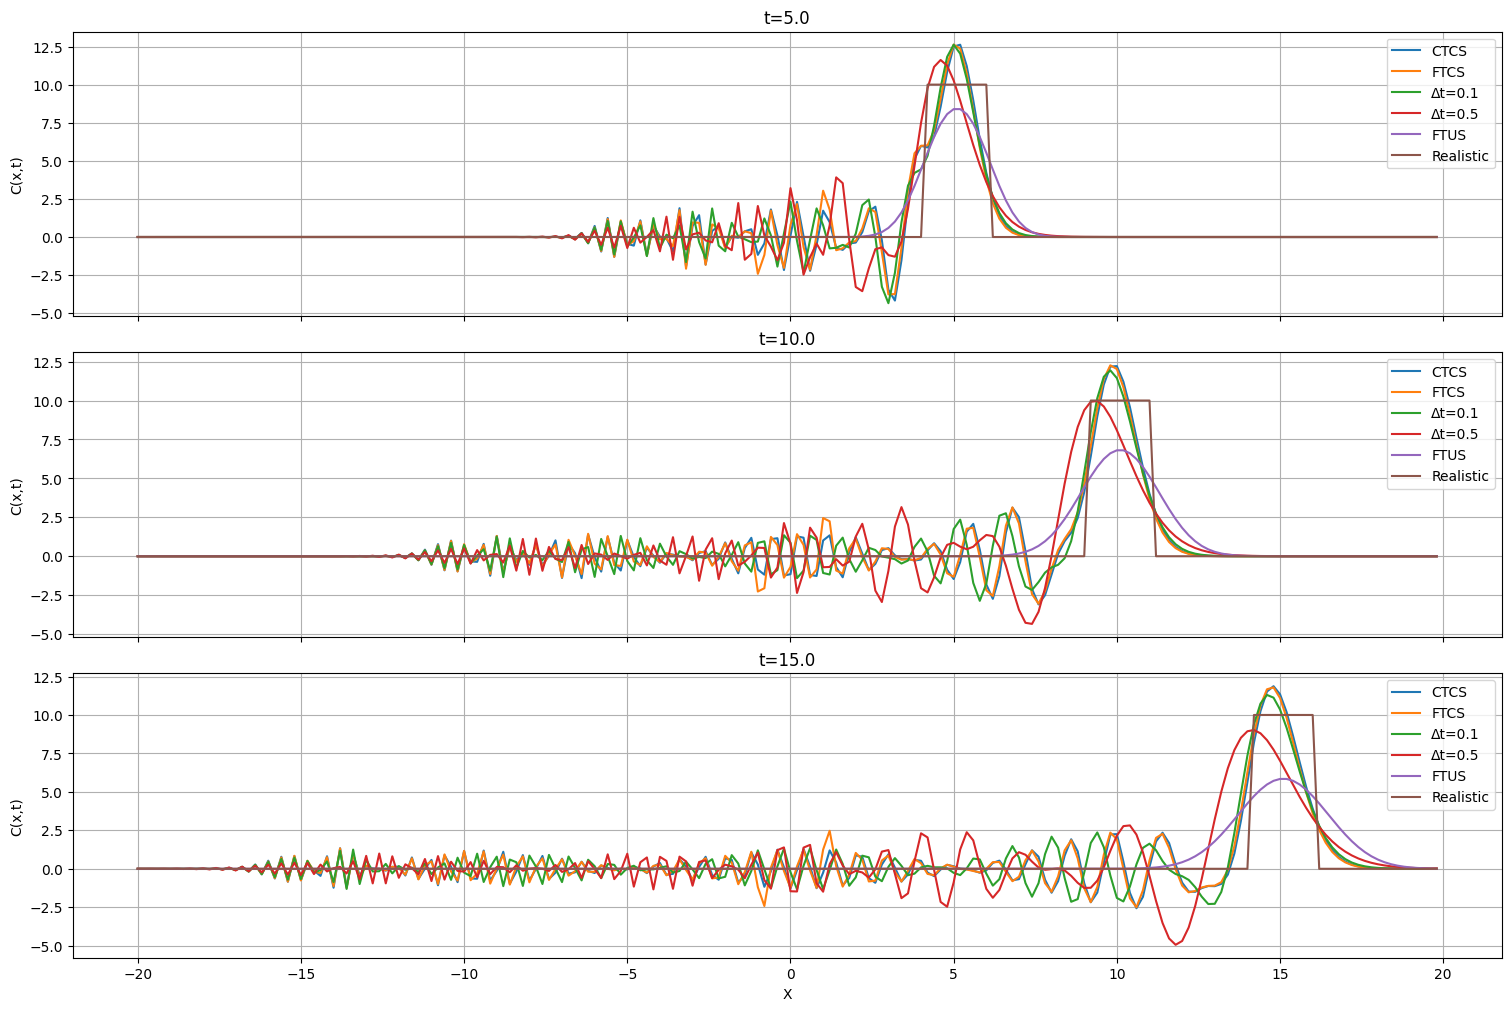

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), constrained_layout=True, sharex=True)

for i in range(0, 3):
    ax[i].set_title(r't=' + str(t_sp[tpoint[i]]))
    ax[i].plot(x, C_CTCS[:, tpoint[i]], label='CTCS')
    ax[i].plot(x, C_FTCS[:, tpoint[i]], label='FTCS')
    ax[i].plot(x, C_ITZ_1[:, tpoint[i]], label='Δt=0.1')
    ax[i].plot(x, C_ITZ_2[:, tpoint2[i]], label='Δt=0.5')
    ax[i].plot(x, C_FTUS[:, tpoint[i]], label='FTUS')
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylabel('C(x,t)')

ax[2].set_xlabel('X')

It is clearly seen that none schemes in stable. The implicit-trapezoidal scheme with Δt=0.5 and FTUS scheme perform worst, with noticeable deviation from the realistic curve and and even from the other schemes. Other schemes values are really close to each other that they quite overlay on the graph. And it is quite hard to be seen but implicit-trapezoidal scheme with Δt=0.1's peak is closet to the square wave.

In [15]:
C_ILF = np.zeros((len(x), len(t_sp)))

In [16]:
for i in range(len(x)):
    if x[i] <= 1 and x[i] >= -1:
        C_ILF[i, 0] = 10
    else:
        C_ILF[i, 0] = 0

In [17]:
A = np.zeros((len(x), len(x)))
B = np.zeros((len(x), len(x)))

for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            A[i, j] = -1
            B[i, j] = 1
        if i == j + 1:
            B[i, j] = -u * dt / (2 * dx)
        if i == j - 1:
            B[i, j] = u * dt / (2 * dx)

matA = np.matrix(A)
matB = np.matrix(B)
B_inv = np.linalg.inv(B)

In [18]:
for n in range(0, len(t_sp) - 1):
    C_ILF_vec = np.matrix(C_ILF[:, n])
    C_ILF_next = -B_inv * (matA * C_ILF_vec.T)
    C_ILF[:, n + 1] = C_ILF_next.T

Text(0.5, 0, 'X')

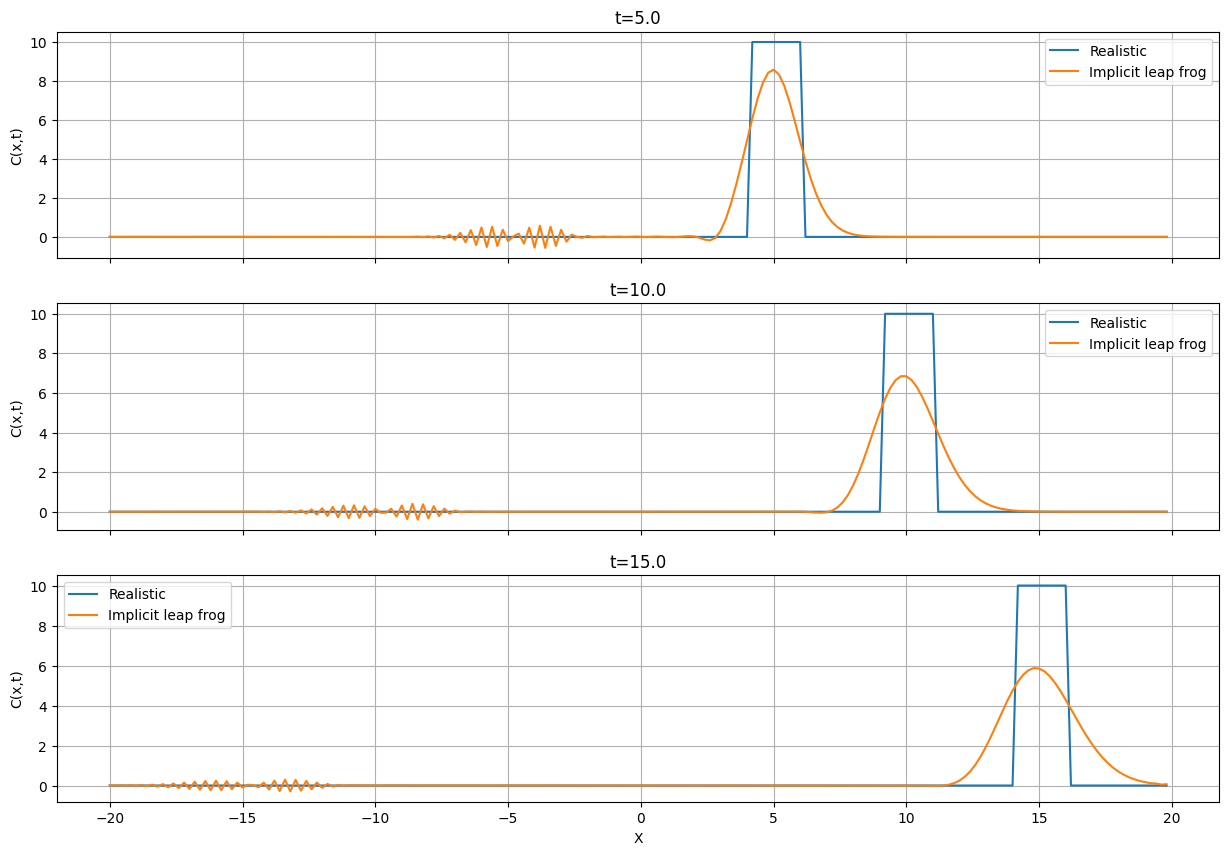

In [19]:
for i in range(len(t_sp)):
    if t_sp[i] == 5:
        t5 = i
    if t_sp[i] == 10:
        t10 = i
    if t_sp[i] == 15:
        t15 = i

tpoint = [t5, t10, t15]

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i in range(0,3):
    ax[i].set_title(r't=' + str(t_sp[tpoint[i]]))
    ax[i].plot(x, C_real[:, tpoint[i]], label='Realistic')
    ax[i].plot(x, C_ILF[:, tpoint[i]], label='Implicit leap frog')
    ax[i].grid(True)
    ax[i].set_ylabel('C(x,t)')
    ax[i].legend()

ax[2].set_xlabel('X')

The leap frog remove most but not all of the fluctuation and show the moving peak, but it can't hold the height of the peak for long, and soon drop. The longer the time is, the clearer this can be seen, at t=15, it even can only reach half then drop.